In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Barley Data set!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/barley.csv')

In [3]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008,Andhra Pradesh
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008,Andhra Pradesh
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008,Andhra Pradesh
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,02-08-2008,Andhra Pradesh
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,01-08-2008,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
173730,Dehradoon,Vikasnagar,Barley (Jau),Other,FAQ,1200.0,1500.0,1500.0,03-09-2013,Uttrakhand
173731,Dehradoon,Vikasnagar,Barley (Jau),Other,FAQ,1250.0,1250.0,1250.0,11-08-2013,Uttrakhand
173732,Dehradoon,Vikasnagar,Barley (Jau),Other,FAQ,1300.0,1300.0,1300.0,19-07-2013,Uttrakhand
173733,Dehradoon,Vikasnagar,Barley (Jau),Other,FAQ,1300.0,1300.0,1300.0,11-06-2013,Uttrakhand


# Pre-processing

In [4]:
df.shape

(173735, 10)

In [5]:
rows = df.shape[0]
rows

173735

In [6]:
cols = df.shape[1]
cols

10

In [7]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [8]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [9]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [10]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 164 unique values!
The column Market Name has 508 unique values!
The column Commodity has 1 unique values!
The column Variety has 5 unique values!
The column Grade has 2 unique values!
The column Min Price (Rs./Quintal) has 2082 unique values!
The column Max Price (Rs./Quintal) has 2216 unique values!
The column Modal Price (Rs./Quintal) has 2365 unique values!
The column Price Date has 5075 unique values!
The column State has 22 unique values!


In [11]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date', 'State'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date', 'state'],
      dtype='object')


In [13]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008,Andhra Pradesh
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008,Andhra Pradesh
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008,Andhra Pradesh
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,02-08-2008,Andhra Pradesh
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,01-08-2008,Andhra Pradesh


In [14]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [15]:
df.head(3)


,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008,Andhra Pradesh,8,2008
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008,Andhra Pradesh,8,2008
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008,Andhra Pradesh,8,2008


In [16]:
df['price_date'].dtype


dtype('O')

In [17]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
state                                object
month                                 int64
year                                  int64
dtype: object


In [18]:
df_copy = df

# Encoding Columns

## district Name

In [19]:
df['district_name'].nunique()

164

In [20]:
value_counts = df['district_name'].value_counts()

In [21]:
value_counts

Ganganagar        16876
Jaipur            14362
Hanumangarh        8917
Ajmer              8005
Tonk               7978
                  ...  
Nashik                1
Visakhapatnam         1
Bargarh               1
Moga                  1
Malda                 1
Name: district_name, Length: 164, dtype: int64

In [22]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [23]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,Andhra Pradesh,8,2008,30
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,Andhra Pradesh,8,2008,30
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,Andhra Pradesh,8,2008,30
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,Andhra Pradesh,8,2008,30
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,Andhra Pradesh,8,2008,30


## market name

In [24]:
df['market_name'].nunique()

508

In [25]:
value_counts = df['market_name'].value_counts()

In [26]:
value_counts

Rajasamand                     3037
Dahod                          2838
Neemuch                        2790
Alwar                          2705
Chomu                          2642
                               ... 
Barad                             1
Jodhpur(Grain)(Phalodi)           1
Dholka(Koth)                      1
New Grain Market , Sonipat        1
Samsi                             1
Name: market_name, Length: 508, dtype: int64

In [27]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [28]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,Andhra Pradesh,8,2008,30,30
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,Andhra Pradesh,8,2008,30,30
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,Andhra Pradesh,8,2008,30,30
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,Andhra Pradesh,8,2008,30,30
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,Andhra Pradesh,8,2008,30,30


In [29]:
df = df.drop('commodity',axis=1)

## variety

In [30]:
df['variety'].nunique()

5

In [31]:
value_counts = df['variety'].value_counts()

In [32]:
value_counts

Other      132651
Deshi       31530
Local        6064
Dara         2696
P1-426        794
Name: variety, dtype: int64

In [33]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [34]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Cuddapah,Cuddapah,Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,Andhra Pradesh,8,2008,30,30,31530
1,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,Andhra Pradesh,8,2008,30,30,31530
2,Cuddapah,Cuddapah,Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,Andhra Pradesh,8,2008,30,30,31530
3,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,Andhra Pradesh,8,2008,30,30,31530
4,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,Andhra Pradesh,8,2008,30,30,31530


## grade

In [35]:
df['grade'].unique()

array(['FAQ ', 'Medium '], dtype=object)

In [36]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        173734
Medium          1
Name: grade, dtype: int64

In [37]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [38]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Cuddapah,Cuddapah,Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,Andhra Pradesh,8,2008,30,30,31530,173734
1,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,Andhra Pradesh,8,2008,30,30,31530,173734
2,Cuddapah,Cuddapah,Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,Andhra Pradesh,8,2008,30,30,31530,173734
3,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,Andhra Pradesh,8,2008,30,30,31530,173734
4,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,Andhra Pradesh,8,2008,30,30,31530,173734


## state

In [39]:
df['state'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chattisgarh', 'NCT of Delhi',
       'Gujarat', 'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Karnataka',
       'Kerala', 'Maharashtra', 'Madhya Pradesh', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Telangana', 'Tamil Nadu', 'Tripura',
       'Uttrakhand', 'West Bengal'], dtype=object)

In [40]:
value_counts = df['state'].value_counts()
value_counts

Rajasthan           105325
Madhya Pradesh       42673
Haryana              11939
Gujarat               8466
NCT of Delhi          2574
Punjab                 923
Chattisgarh            403
Karnataka              329
Jharkhand              295
Uttrakhand             285
Telangana              212
Kerala                 154
Assam                   52
Andhra Pradesh          45
Maharashtra             20
Odisha                  18
Himachal Pradesh        10
Bihar                    6
Nagaland                 3
Tamil Nadu               1
Tripura                  1
West Bengal              1
Name: state, dtype: int64

In [41]:
state_frequency = df['state'].value_counts(normalize=False)

# Create a new column with encoded values
df['state_encoded'] = df['state'].map(state_frequency)

In [42]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Cuddapah,Cuddapah,Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,Andhra Pradesh,8,2008,30,30,31530,173734,45
1,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,Andhra Pradesh,8,2008,30,30,31530,173734,45
2,Cuddapah,Cuddapah,Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,Andhra Pradesh,8,2008,30,30,31530,173734,45
3,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,Andhra Pradesh,8,2008,30,30,31530,173734,45
4,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,Andhra Pradesh,8,2008,30,30,31530,173734,45


# Taking only the Encoded columns

In [43]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [44]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,30,30,31530,173734,45,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,30,30,31530,173734,45,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,30,30,31530,173734,45,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,30,30,31530,173734,45,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,30,30,31530,173734,45,8,2008,2008-08-01,1150.0,1175.0,1165.0
5,30,30,31530,173734,45,7,2008,2008-07-31,1050.0,1150.0,1075.0
6,30,30,31530,173734,45,7,2008,2008-07-30,1050.0,1080.0,1075.0
7,30,30,31530,173734,45,7,2008,2008-07-29,1150.0,1250.0,1220.0


# Heat Map

<ipython-input-45-f636cb7d937b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


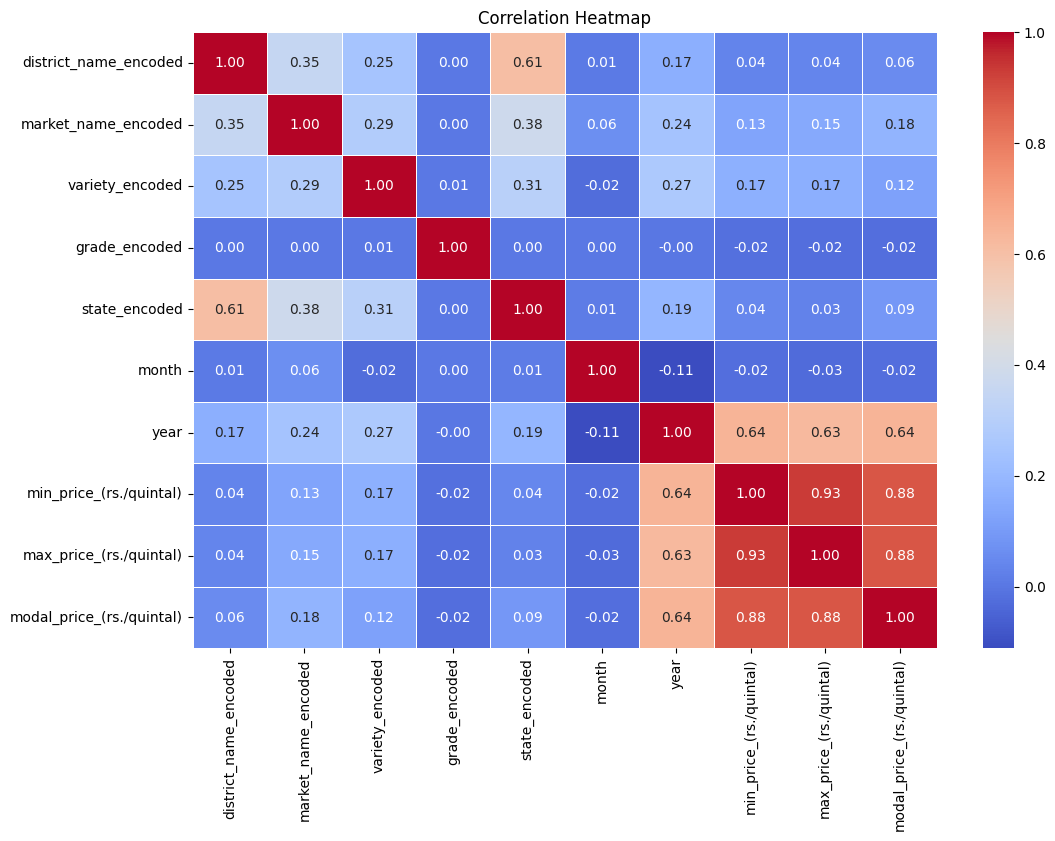

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [46]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [47]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,30,30,31530,173734,45,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,30,30,31530,173734,45,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,30,30,31530,173734,45,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,30,30,31530,173734,45,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,30,30,31530,173734,45,8,2008,2008-08-01,1150.0,1175.0,1165.0


# Outlier Removing rows

In [48]:
import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]



In [49]:
df_encoded = df_cleaned

## Standardizing values (min-max scalar)

In [50]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,30,30,31530,173734,45,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,30,30,31530,173734,45,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,30,30,31530,173734,45,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,30,30,31530,173734,45,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,30,30,31530,173734,45,8,2008,2008-08-01,1150.0,1175.0,1165.0
...,...,...,...,...,...,...,...,...,...,...,...
173730,19,17,132651,173734,285,9,2013,2013-09-03,1200.0,1500.0,1500.0
173731,19,17,132651,173734,285,8,2013,2013-08-11,1250.0,1250.0,1250.0
173732,19,17,132651,173734,285,7,2013,2013-07-19,1300.0,1300.0,1300.0
173733,19,17,132651,173734,285,6,2013,2013-06-11,1300.0,1300.0,1300.0


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


In [52]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-01,1150.0,1175.0,1165.0


## Forward Stepwise Selection

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [54]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'state_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [55]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.6052
Selected feature: district_name_encoded, Score: 0.6109
Selected feature: month, Score: 0.6156
Selected feature: market_name_encoded, Score: 0.6188
Selected feature: state_encoded, Score: 0.6200
Selected feature: variety_encoded, Score: 0.6203
Selected feature: grade_encoded, Score: 0.6203
['year', 'district_name_encoded', 'month', 'market_name_encoded', 'state_encoded', 'variety_encoded', 'grade_encoded']


### All the features are closely important

## Linear Regression

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [58]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[ 880.98098889,  921.09158161,  906.51742231],
       [ 871.57023574,  916.81607604,  900.85024271],
       [1128.27084995, 1175.61042144, 1153.95583973],
       ...,
       [ 931.17678814,  981.46092564,  966.24597584],
       [1444.60825469, 1512.34093281, 1480.47139557],
       [ 874.12233182,  914.49018906,  903.01590864]])

In [60]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 136.06881499387916
Root Mean Square error is: 176.86843615027936
R2 score is: 0.6204776368112378


## Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [62]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 46.12234591414728
Root Mean Square error is: 80.00161961436137
R2 score is: 0.9223590493913812


## Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(
    n_estimators=200,  # Reduced number of trees
    max_depth=30,  # Reduced maximum depth
    random_state=42,
    bootstrap=True,
    warm_start=True,  # Enable incremental training
    n_jobs=-1  # Utilize all CPU cores
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

In [64]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 45.22171011897948
Root Mean Square error is: 76.6005168544518
R2 score is: 0.9288204133697374


## XgBoost Regression

In [65]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.37,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 47.26004756950466
Root Mean Square error is: 76.31655733101891
R2 score is: 0.9293476818332439


## KNN Regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 50.341194446101134
Root Mean Square error is: 85.19870796758731
R2 score is: 0.9119534466447264


# Datasets of Barley

## Main

In [67]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Cuddapah,Cuddapah,Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,Andhra Pradesh,8,2008,30,30,31530,173734,45
1,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,Andhra Pradesh,8,2008,30,30,31530,173734,45
2,Cuddapah,Cuddapah,Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,Andhra Pradesh,8,2008,30,30,31530,173734,45
3,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,Andhra Pradesh,8,2008,30,30,31530,173734,45
4,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,Andhra Pradesh,8,2008,30,30,31530,173734,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173730,Dehradoon,Vikasnagar,Other,FAQ,1200.0,1500.0,1500.0,2013-09-03,Uttrakhand,9,2013,19,17,132651,173734,285
173731,Dehradoon,Vikasnagar,Other,FAQ,1250.0,1250.0,1250.0,2013-08-11,Uttrakhand,8,2013,19,17,132651,173734,285
173732,Dehradoon,Vikasnagar,Other,FAQ,1300.0,1300.0,1300.0,2013-07-19,Uttrakhand,7,2013,19,17,132651,173734,285
173733,Dehradoon,Vikasnagar,Other,FAQ,1300.0,1300.0,1300.0,2013-06-11,Uttrakhand,6,2013,19,17,132651,173734,285


### Saving the dataframe of barley

> Indented block



In [68]:
df.to_csv('bardf.csv')

## Encoded

In [69]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,0.001719,0.009552,0.233101,0.0,0.000418,8,2008,2008-08-01,1150.0,1175.0,1165.0
...,...,...,...,...,...,...,...,...,...,...,...
173730,0.001067,0.005270,1.000000,0.0,0.002696,9,2013,2013-09-03,1200.0,1500.0,1500.0
173731,0.001067,0.005270,1.000000,0.0,0.002696,8,2013,2013-08-11,1250.0,1250.0,1250.0
173732,0.001067,0.005270,1.000000,0.0,0.002696,7,2013,2013-07-19,1300.0,1300.0,1300.0
173733,0.001067,0.005270,1.000000,0.0,0.002696,6,2013,2013-06-11,1300.0,1300.0,1300.0


### Saving the encoded dataframe of mustard

In [70]:
df_encoded.to_csv('barencdf.csv')

# Saving the Best Model

In [71]:
import pickle

# Pickle the model
with open('xg_regressor.pkl', 'wb') as f:
    pickle.dump(xg_regressor, f)